Hi Yonatan. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Thank you! Your project has been received. You've done a lot of work. Regrettably, your project is not quite ready for review. This is because the period of time for analysis is wrong. You've already done a lot, I am sure you can handle it!

Hi Svetlana,

Thank you for reviewing my project.

I changed several things according to your comments.

I hope it is better now :)

Yonatan

## Review v. 2<a class="tocSkip">

You've worked hard and now your project is perfect! Your project has passed code review. Congratulations! Well done!


# Project  description 
You  work for  the  online  store Ice, which  sells  video  games  all  over  the world.  User and expert reviews,  genres,  platforms  (e.g. Xbox  or PlayStation),  and  historical  data on game  sales  are available  from  open sources.  You  need to identify  patterns  that  determine  whether  a game succeeds  or not.  This  will  allow  you  to spot potential  big  winners  and plan  advertising campaigns. 

In front of you is data going  back to 2016. Let’s imagine  that it’s December 2016 and you’re planning  a campaign  for  2017. 

The  important  thing  is  to get experience  working  with  data. It doesn't really  matter  whether you're  forecasting  2017 sales  based on data from  2016 or 2027 sales  based on data from  2026. The  dataset contains  the abbreviation  ESRB.  The  Entertainment  Software  Rating  Board evaluates  a game's  content  and assigns  an age rating  such  as Teen  or Mature. 






**Data description**
* Name 
* Platform 
* Year_of_Release 
* Genre 
* NA_sales (North  American  sales  in  USD million) 
* EU_sales (sales  in  Europe  in  USD million) 
* JP_sales (sales  in  Japan in  USD million) 
* Other_sales (sales  in  other  countries  in  USD million) 
* Critic_Score (maximum  of 100) 
* User_Score (maximum  of 10) 
* Rating (ESRB) Data for  2016 may  be incomplete. 

# intruduction

In this project, we will explore the dataset of games. 

First, we will do the preprocessing: missing values, converting data types etc.

Afterwards, we will analize the data using differend kinds of plots and calcultions. 

In the next step, we will examine two hypotheses on the data:
* Average user ratings of the Xbox One and PC platforms are the same.
* Average user ratings for the Action and Sports genres are different.

Finally, we will conclude the whole process.

I hope, you will enjoy :)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
👍👍👍
</div>

## Open  the data file and study  the general information 

### Installs

In [1]:
!pip install --user sidetable
!pip install squarify

     |████████████████████████████████| 10.8 MB 1.0 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable


### Imports

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
import seaborn as sns
import sidetable
import squarify
import warnings
warnings.simplefilter('ignore')

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
try:
    df = pd.read_csv('/Users/yonatan/Desktop/Practicum/Integrated Project 1/games.csv')

except:
    df = pd.read_csv('/datasets/games.csv')

df.sample(10)    

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8934,Hoppechan: Tsukutte! Asonde! Punipuni Town!!,3DS,2013.0,Action,0.00,0.00,0.15,0.00,NaN,NaN,NaN
15776,Rogue Trooper,XB,2006.0,Shooter,0.01,0.00,0.00,0.00,71.0,8.5,T
12132,Goodbye Deponia,PC,2013.0,Adventure,0.00,0.06,0.00,0.00,80.0,7.9,NaN
4136,Dynasty Warriors Gundam,PS3,2007.0,Action,0.14,0.01,0.31,0.02,60.0,6.9,T
16429,Greg Hastings' Tournament Paintball Max'd,PS2,2006.0,Shooter,0.01,0.00,0.00,0.00,70.0,9.2,E10+
1957,Darksiders,X360,2010.0,Action,0.67,0.28,0.01,0.10,83.0,7.9,M
2126,Mass Effect 3,PC,2012.0,Role-Playing,0.40,0.44,0.00,0.12,89.0,5.5,M
14136,Luminous Arc 3,DS,2009.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
1019,Star Wars Episode I: The Phantom Menace,PS,1999.0,Adventure,0.72,0.89,0.04,0.10,NaN,NaN,NaN
7382,The Fairly OddParents: Breakin' Da Rules,GC,2003.0,Platform,0.16,0.04,0.00,0.01,NaN,NaN,NaN


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's a really good idea to use try-except for the path to the file in case of local work.
</div>

### DataFrame info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


### Conclusion

Problems in the dataset: missing values, upper and lower cases, converting data types of several columns.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly noted the main problems with data.
</div>

## Prepare  the data 

### Replace the column names to lowercase

In [6]:
df.columns = df.columns.str.lower()
df.name = df.name.str.lower()
df.platform = df.platform.str.lower()
df.genre = df.genre.str.lower()

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you bring columns to the lower case.
</div>

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In order to deal with case sensitivity, we lowered the case in several columns in addition to columns names.

### Missing values

Let's check the percentage of missing values in our DataFrame:

In [8]:
df.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


So we have 6 columns with missing values: critic_score (51.32), rating (40.48), user_score (40.09), year_of_release (1.61), name (0.01), genre (0.01).

Possible reasons for missing values: 
* lack of data
* human/machine errors
* 'tbd' (to be determined) - data that we'll have later.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain a possible reasond of a missing values?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, a missing values can be due to human/technical errors or optionality of the fields.
</div>

In [9]:
len(df[df.duplicated()])


0

No duplicates in the dataset.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, there are no duplicates in our data.
</div>

### Convert the data to the required types. 

In [10]:
df.year_of_release = df.year_of_release.fillna(0).astype('int')

In order to filter through years, we fill in the missing values with zero. In addition, we converted the data type to int, because there is no sense in float in case of years.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a reasonable decision :)
</div>

In [11]:
df.loc[df.user_score == 'tbd', 'user_score'] = np.nan
df.user_score = df.user_score.astype('float')

In the info above, we saw that user score is an object. If we look at the values of user score, we can see a mix between floats (written as a string) and 'tbd' (to be determined). In order to be able to do calculation on this column, we fill in the missing values with NaN and converted the data type to float.

### Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column

In [12]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Conclusion

In this section, we:
* replaced the column names and several columns to lowercase.
* filled in missing values in year_of_release and user_score and converted their data types.
* Calculated the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

##  Analyze  the data 

### Look at how many games were released in different years. Is the data for every period significant? 

In [13]:
filtered_df = df.query('year_of_release != 0')
year_pivot = pd.pivot_table(filtered_df, values='name', index='year_of_release', aggfunc='count').reset_index()
year_pivot.columns = ['year_of_release', 'number_of_games']
year_pivot

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


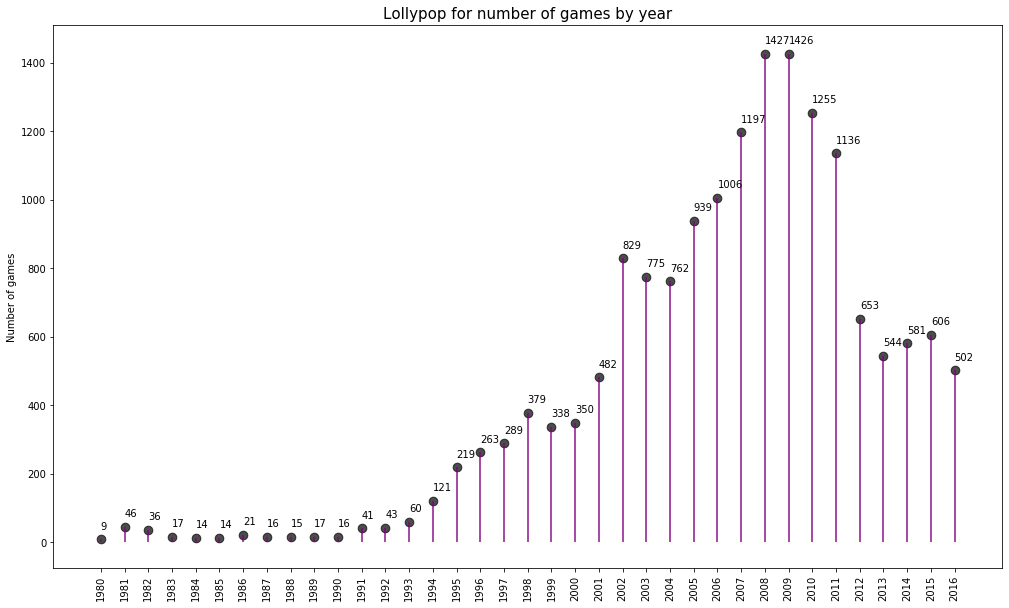

In [14]:
fig, ax = plt.subplots(figsize=(17, 10))
ax.vlines(x=year_pivot.year_of_release, ymin=0, ymax=year_pivot.number_of_games, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=year_pivot.year_of_release, y=year_pivot.number_of_games, s=75, color='black', alpha=0.7)

ax.set_title('Lollypop for number of games by year', fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(year_pivot.year_of_release)
ax.set_xticklabels(year_pivot.year_of_release, rotation=90)

for row in year_pivot.itertuples():
    ax.text(row.year_of_release, row.number_of_games+30, s=row.number_of_games)


As we can see, along the 80s and half of 90s, there are't much games. Probably because it was the beginning of the industry,and there weren't much PCs. At the second half of the 90s, we can see increase in number of games till 2008. In this period, many people bought PCs. Then, we see a decrease in number of video games till 2016, maybe because of the rising of the online games.

The data is not equally significant for all the years. There isn't enough data for the 80s and 90s.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please analyse dynamics of the total sales? Are there any trends?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you corrrectly noted main trends :)
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Could you please describe a possible reason of increasing and decreasing in the number of games?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, the growth the number of games could be associated with an increase in the number of personal computers/platforms per user, and the decline with the growing popularity of mobile and online games.
</div>

### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.

In [15]:
total_sales_pivot = pd.pivot_table(filtered_df, values='total_sales', index='platform', aggfunc='sum')
total_sales_pivot.sort_values(by='total_sales', inplace=True)
total_sales_pivot.reset_index(inplace=True)
total_sales_pivot.head()

,platform,total_sales
0,pcfx,0.03
1,gg,0.04
2,3do,0.10
3,tg16,0.16
4,ws,1.42


In [16]:
total_sales_pivot['sales_z'] = (total_sales_pivot['total_sales'] - total_sales_pivot['total_sales'].mean()) / total_sales_pivot['total_sales'].std()
total_sales_pivot

,platform,total_sales,sales_z
0,pcfx,0.03,-0.826947
1,gg,0.04,-0.826918
2,3do,0.10,-0.826744
3,tg16,0.16,-0.826569
4,ws,1.42,-0.822906
5,ng,1.44,-0.822847
6,scd,1.86,-0.821626
7,dc,15.95,-0.780654
8,gen,30.77,-0.737560
9,sat,33.59,-0.729359


In [17]:
total_sales_pivot['color'] = ['red' if x < 0 else 'green' for x in total_sales_pivot['sales_z']]
total_sales_pivot

,platform,total_sales,sales_z,color
0,pcfx,0.03,-0.826947,red
1,gg,0.04,-0.826918,red
2,3do,0.10,-0.826744,red
3,tg16,0.16,-0.826569,red
4,ws,1.42,-0.822906,red
5,ng,1.44,-0.822847,red
6,scd,1.86,-0.821626,red
7,dc,15.95,-0.780654,red
8,gen,30.77,-0.737560,red
9,sat,33.59,-0.729359,red


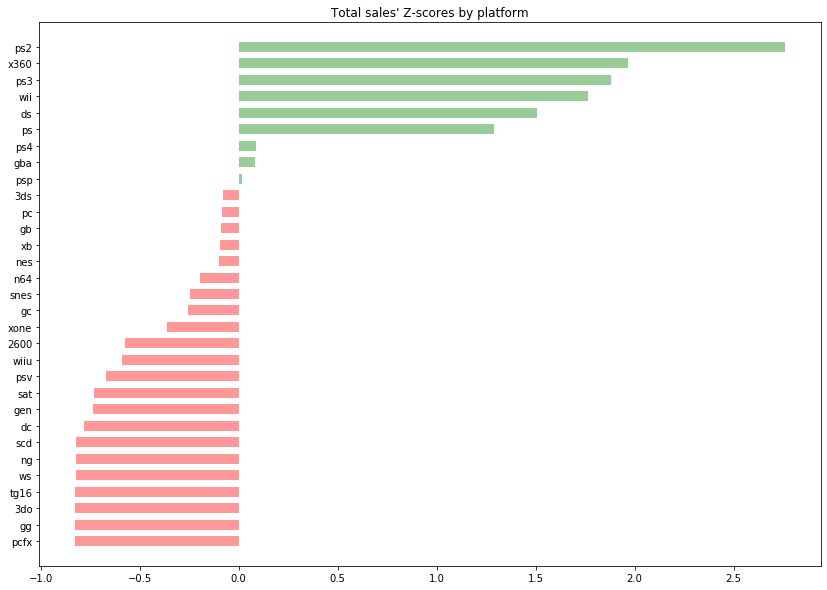

In [18]:
plt.figure(figsize=(14, 10))
plt.hlines(y=total_sales_pivot.platform, xmin=0, xmax=total_sales_pivot.sales_z, color=total_sales_pivot.color, alpha=0.4, linewidth=10)
plt.title("Total sales' Z-scores by platform")
plt.show()

We can see a graph of total sales Z-scores by platform. The platforms in green are the platforms with total sales above the average total sales of all the platfroms. The red ones are the platforms which their total sales are under this average.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please describe graphs? Please note that after each of the graphs it's necessary to add description/conclusions.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you clearly analysed graph.
</div>

As we can see above and below, these are the platforms with the greatest total sales:

In [19]:
greatest_total_sales = total_sales_pivot.nlargest(5, ['total_sales'])
platforms_names = greatest_total_sales.platform.tolist()
platforms_names

['ps2', 'x360', 'ps3', 'wii', 'ds']

In [20]:
greatest_total_sales_platforms = filtered_df.query('platform in @platforms_names')
greatest_total_sales_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


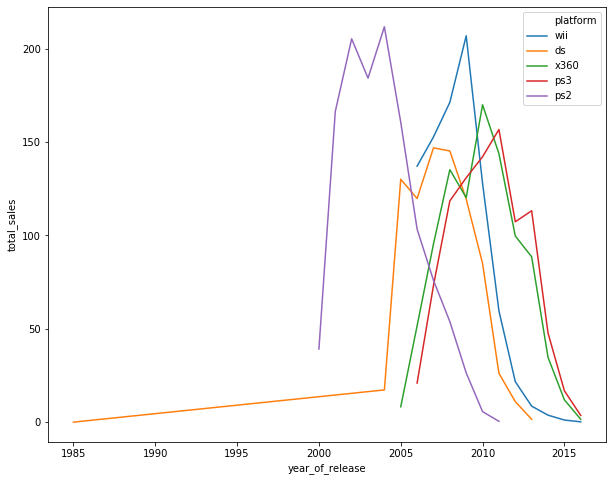

In [21]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=greatest_total_sales_platforms , x='year_of_release', y='total_sales', hue='platform', estimator='sum', markers=False, ci = None)
plt.show()

We can see the total sales by year of the 5 greatest platforms. Each platform has an increase of about 5 years till reaching the total sales' peak and then a decrease of about 5 years.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please analyse graph more clearly? Please describe the changes in total sales for the most popular platforms.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

### Find platforms that used to be popular but now have *zero sales*. How long does it generally take for new platforms to appear and old ones to fade? 

In [22]:
for platform in platforms_names:
    platform_df = greatest_total_sales_platforms.query('platform == @platform')
    print(platform, platform_df.year_of_release.max() - platform_df.year_of_release.min())

ps2 11
x360 11
ps3 10
wii 10
ds 28


We can see from the cell above and the previous line plot, that the lifetime of a platform is about 10 years.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a typical lifespan of the platforms is about 10-11 year. Please note that lifespan is slightly decreased with time.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that Ridgeplots can be useful here: https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/   
</div>

### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.  Work only with the data that you've decided is relevant. Disregard the data for previous years.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it's better to use data since 2014. Could you please explain why? Please fix it and I will check the next parts of the project.
</div>

In [23]:
filtered_df = df.query('year_of_release >= 2014')

It's better to use data since 2014, because the data of the recent years is the most relevant for 2017's prognosis.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
The reason why to chose data since 2014 is the following. We see that the leader in sales for the entire history of the PS2. But sales by 2011 are already zero. The X360 was at its peak in 2010, but by 2016 it had fallen to almost 0. In general, a sharp decline in the platform can occur in just 3 years. Let's look at this sales horizon.
</div>


### Which platforms are leading in sales? 


In [24]:
total_sales_pivot = pd.pivot_table(filtered_df, values='total_sales', index='platform', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
total_sales_pivot

sizes = total_sales_pivot.total_sales.values.tolist()
label = total_sales_pivot.apply(lambda x: str(x[0]) + '\n' + '$' + str(round(x[1])), axis=1)

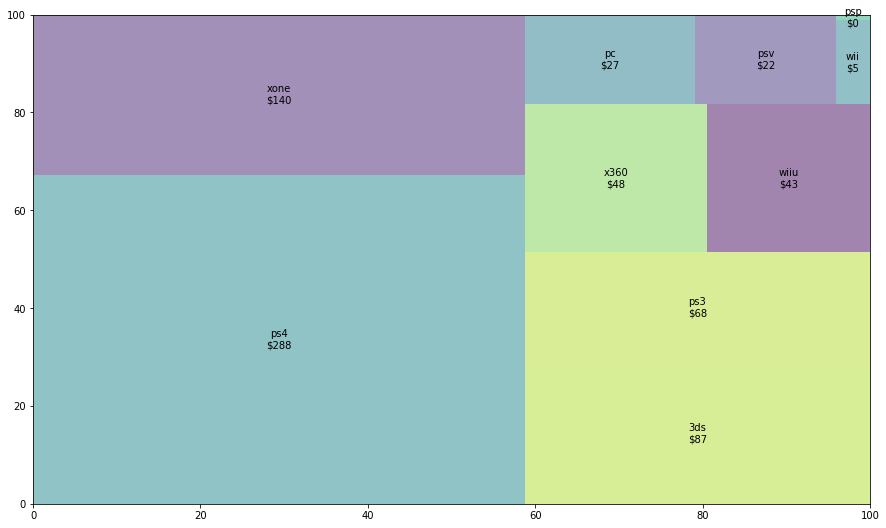

In [25]:
plt.figure(figsize=(15, 9))
squarify.plot(sizes=sizes, label=label, alpha=0.5)
plt.show()

The leading platforms in sales are xone and ps4.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, Xbox One and PS4 are leading platforms.
</div>

### Which ones are growing or shrinking? Select several potentially profitable platforms.

In [26]:
sales_years_pivot = pd.pivot_table(filtered_df, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)
sales_years_pivot

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [27]:
dynamics = sales_years_pivot - sales_years_pivot.shift(+1)
dynamics.T

year_of_release,2014,2015,2016
platform,,,
3ds,NaN,-15.98,-12.64
pc,NaN,-4.76,-3.27
ps3,NaN,-30.94,-13.22
ps4,NaN,18.90,-49.65
psp,NaN,-0.12,-0.12
psv,NaN,-5.65,-2.00
wii,NaN,-2.61,-0.96
wiiu,NaN,-5.68,-11.75
x360,NaN,-22.78,-10.44


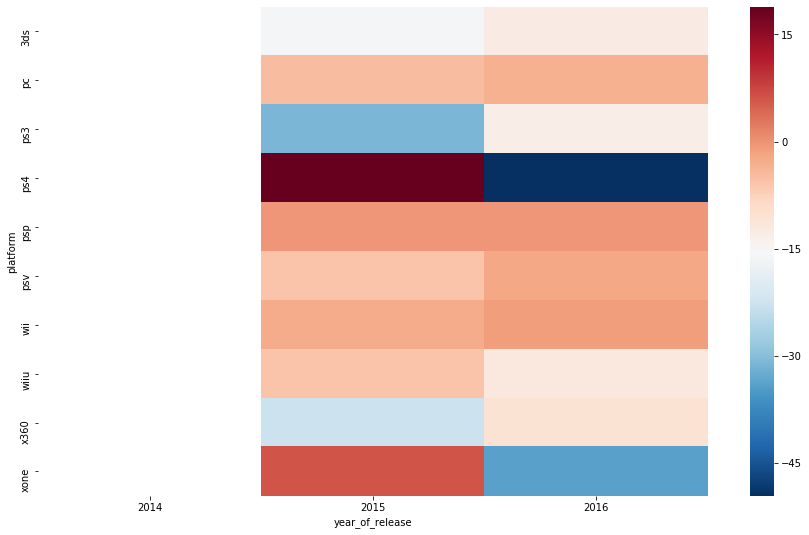

In [28]:
plt.figure(figsize=(15,9))
sns.heatmap(dynamics.T, cmap='RdBu_r')
plt.show()

Several potentially profitable platforms: x360, wii, ps3.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>


### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.


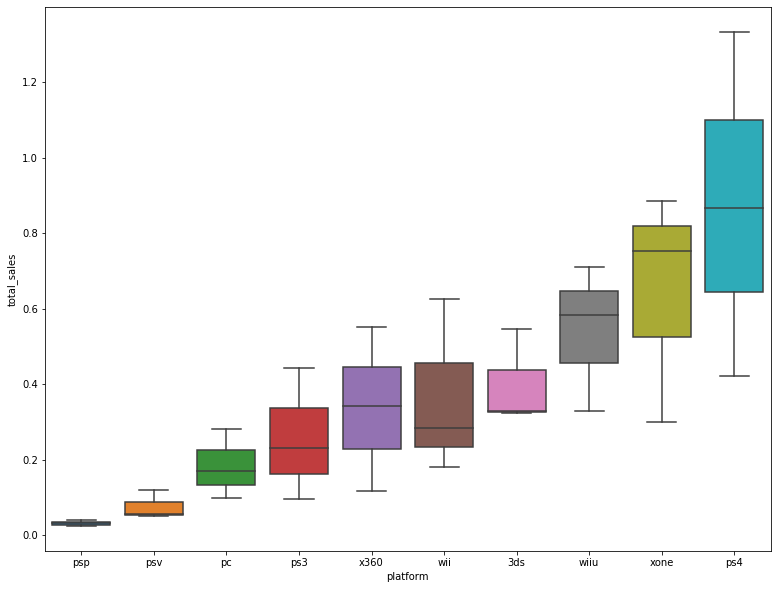

In [29]:
grouped=filtered_df.groupby(['platform','year_of_release'])['total_sales'].mean().reset_index()

ordered=grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']


plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped,order=ordered)
plt.show()

The differences in sales look significant. We can see that the total sales averages vary significantly from platform to platform.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You correctly noted that the average total sales vary significantly from platform to platform.
</div>


### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.


,critic_score,total_sales
critic_score,1.0,1.0
total_sales,1.0,1.0


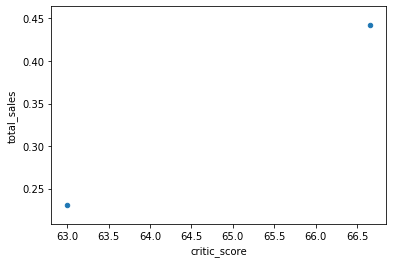

In [30]:
platform = filtered_df[filtered_df.platform == 'ps3']
critic_pivot = pd.pivot_table(platform, values=['critic_score', 'total_sales'], index='year_of_release', aggfunc='mean')
critic_pivot = critic_pivot[critic_pivot.notnull().all(axis=1)]
critic_pivot.critic_score = round(critic_pivot.critic_score, 2)

critic_pivot.plot.scatter(x='critic_score', y='total_sales')
critic_pivot.corr()

,total_sales,user_score
total_sales,1.000000,0.883348
user_score,0.883348,1.000000


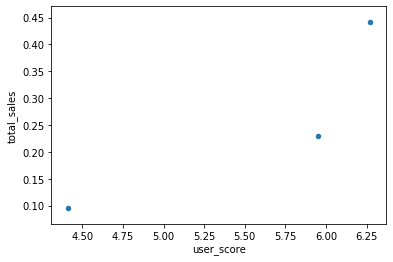

In [31]:
user_pivot = pd.pivot_table(platform, values=['user_score', 'total_sales'], index='year_of_release', aggfunc='mean')
user_pivot = user_pivot[user_pivot.notnull().all(axis=1)]
user_pivot.user_score = round(user_pivot.user_score, 2)

user_pivot.plot.scatter(x='user_score', y='total_sales')
user_pivot.corr()

We can see from the correlation tables and the scatter plots that the critic and user scores (1 and 0.88 respectively) have a strong significant effect on total sales.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You have made a correct conclusion :)
</div>


### Keeping your conclusions in mind, compare the sales of the same games on other platforms.


xone critic score correlation: 0.2
There isn't a strong correlation between critic score and total sales. 

xone user score correlation: 0.24
There isn't a strong correlation between user score and total sales. 

ps4 critic score correlation: 0.98
There is a strong correlation between critic score and total sales. 

ps4 user score correlation: -0.98
There is a strong correlation between user score and total sales. 

3ds critic score correlation: -0.99
There is a strong correlation between critic score and total sales. 

3ds user score correlation: -0.98
There is a strong correlation between user score and total sales. 



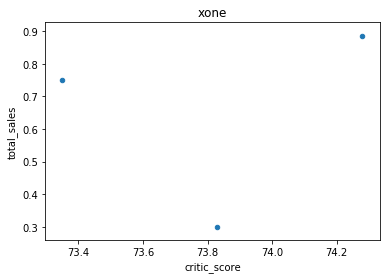

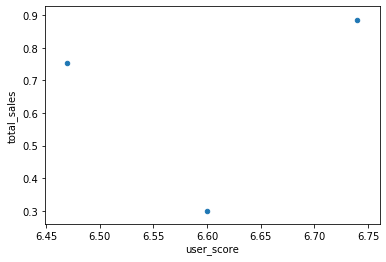

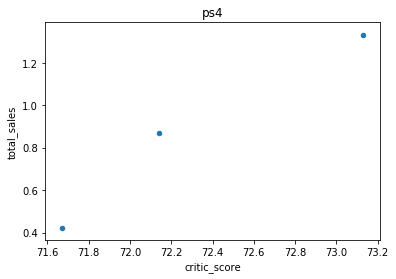

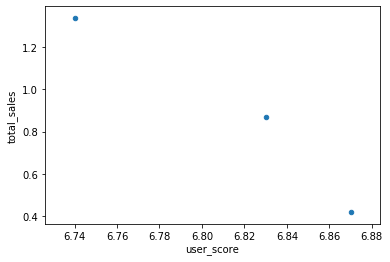

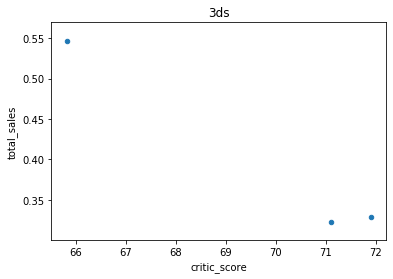

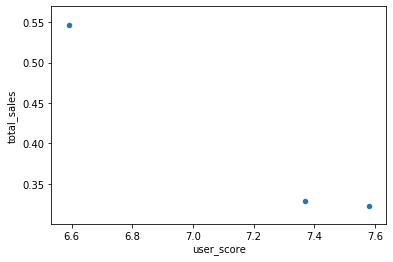

In [32]:
platforms = ['xone', 'ps4', '3ds']

def score_effect(platform_name):
    
    platform = filtered_df[filtered_df.platform == platform_name]
    critic_pivot = pd.pivot_table(platform, values=['critic_score', 'total_sales'], index='year_of_release', aggfunc='mean')
    critic_pivot = critic_pivot[critic_pivot.notnull().all(axis=1)]
    critic_pivot.critic_score = round(critic_pivot.critic_score, 2)
    critic_pivot.plot.scatter(x='critic_score', y='total_sales')
    plt.title(platform_name)
    
    critic_corr = round(critic_pivot.corr().iat[0,1], 2)
    print(platform_name, 'critic score correlation:', critic_corr)
    if abs(critic_corr) >= 0.5:
        print('There is a strong correlation between critic score and total sales.', '\n')
    else:
        print('There isn\'t a strong correlation between critic score and total sales.', '\n')
        
    user_pivot = pd.pivot_table(platform, values=['user_score', 'total_sales'], index='year_of_release', aggfunc='mean')
    user_pivot = user_pivot[user_pivot.notnull().all(axis=1)]
    user_pivot.user_score = round(user_pivot.user_score, 2)
    user_pivot.plot.scatter(x='user_score', y='total_sales')
    
    user_corr = round(user_pivot.corr().iat[0,1], 2)
    print(platform_name, 'user score correlation:', user_corr)
    if abs(user_corr) >= 0.5:
        print('There is a strong correlation between user score and total sales.', '\n')
    else:
        print('There isn\'t a strong correlation between user score and total sales.', '\n')
        
    

for platform in platforms:
    score_effect(platform)

We can see from the correlation tables and scatter plots that 2 other platforms have similar strong effect on total sales in accordance with critic and user scores, the third one has non significant correlation.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, we have a correlations between variables. Please note that correlation function shows only linear dependecy between variables. Maybe this link will be interesting for you: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/.
</div>


### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales? 

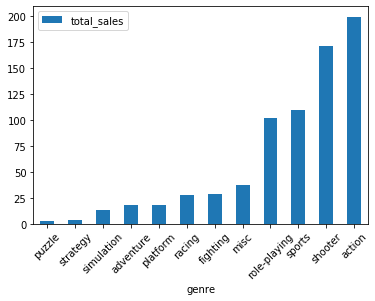

In [33]:
genre_pivot = pd.pivot_table(filtered_df, values='total_sales', index='genre', aggfunc='sum').sort_values(by='total_sales').reset_index()
genre_pivot.plot.bar(x='genre', y='total_sales', rot=45)
plt.show()

The most profitable genres are: action, shooter, sports.

The least profitable genres are: strategy, puzzle, simulation.

### Conclusion

In this section, we saw that:
* the data isn't significant for  every  period.
* the sales  varied  from  platform  to platform. Average lifetime of a platform is 10 years.
* we should take the data since 2014.
* some platforms are very profitable and some not.
* there are significant differences  in  sales across platforms.
* user and professional  reviews  affect  sales across platforms.
* some genres are very profitable and some not.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

## Create a user profile  for  each region For each  region  (NA, EU, JP), determine: 

### Top five platforms by market shares and regions

,eu_sales,jp_sales,na_sales
platform,,,
ps3,43.427988,19.078388,37.493624
wii,55.460385,0.000000,44.539615
x360,35.308867,0.182357,64.508776


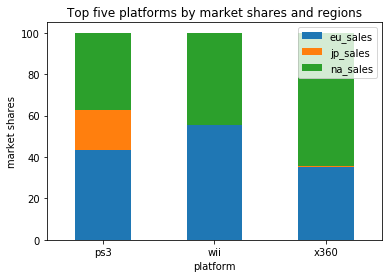

In [34]:
top_five_df = greatest_total_sales_platforms.query('year_of_release >= 2014')
platforms_regions = pd.pivot_table(top_five_df, index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')                                                

platforms_percentage = platforms_regions.div(platforms_regions.sum(axis=1), axis=0) * 100
display(platforms_percentage)

platforms_percentage.plot(kind='bar', stacked=True, rot=0)
plt.title("Top five platforms by market shares and regions")
plt.ylabel("market shares")
plt.show()

We can see that north america has the largest market share of x360, europe has the largest market share of wii and japan has market share only of ps3 (and non significant market share of x360).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, we have different leading platforms for these regions.
</div>

### Top five genres

,eu_sales,jp_sales,na_sales
genre,,,
action,39.638682,16.542685,43.818633
adventure,42.265193,10.220994,47.513812
fighting,20.496894,42.236025,37.267081
misc,46.233230,4.334365,49.432405
platform,55.555556,2.469136,41.975309
puzzle,0.000000,100.000000,0.000000
racing,51.489362,5.106383,43.404255
role-playing,26.484561,29.216152,44.299287
shooter,40.961199,2.910053,56.128748


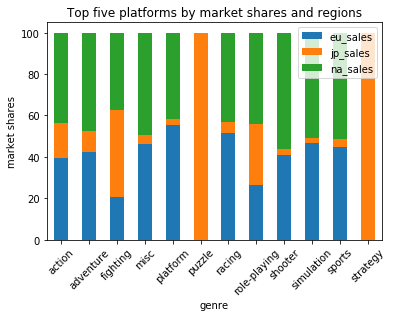

In [35]:
top_five_genres_names = genre_pivot.nlargest(5, ['total_sales']).genre.tolist()
genres_regions = pd.pivot_table(top_five_df, index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')                                                

genres_percentage = genres_regions.div(genres_regions.sum(axis=1), axis=0) * 100
display(genres_percentage)
genres_percentage.plot(kind='bar', stacked=True, rot=45)

plt.title("Top five platforms by market shares and regions")
plt.ylabel("market shares")
plt.show()

We can see differnces between total sales by regions in relation to genres:
* Japan has 100% market share in puzzle and strategy.
* North America has above 50% market share in: shooter, sports  and simulation.
* Europe has above 50% market share in platform. 

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Could you please describe a possible reason of similarities and differences in preferences of these regions?
</div>

### ESRB ratings effect on sales in individual regions

,eu_sales,jp_sales,na_sales
rating,,,
E,49.312043,7.593002,43.094955
E10+,40.971026,6.985121,52.043853
M,47.222924,4.048112,48.728963
T,38.804100,16.833713,44.362187


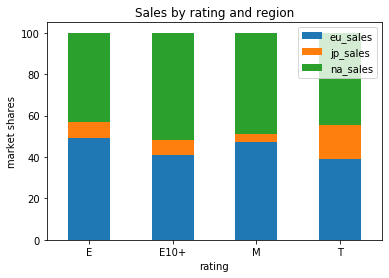

In [36]:
ratings_regions = pd.pivot_table(filtered_df, index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') 
ratings_percentage = ratings_regions.div(ratings_regions.sum(axis=1), axis=0) * 100

display(ratings_percentage)
ratings_percentage.plot(kind='bar', stacked=True, rot=0)

plt.title("Sales by rating and region")
plt.ylabel("market shares")
plt.show()

We can see that:
* Japan's largest market share is T rating.
* North America has above 50% market share in E10+ rating.
* Europe's largest market share is E rating (almost 50%).

### Conclusion

In this section we:
* looked at the top five platforms and described variations in their market shares from region to region.
* looked at the top five genres and described variations in their market shares from region to region.
* saw the effect of ESRB ratings on sales in different regions.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

## Test the following  hypotheses: 

### Hypothesis: Average user ratings of the Xbox One and PC platforms are the same

In [37]:
alpha = 0.05 
sample_1 = filtered_df.query('platform == "xone" and user_score.notnull()').user_score
sample_2 = filtered_df.query('platform == "pc" and user_score.notnull()').user_score

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.10450507919348415
We can't reject the null hypothesis


* H0: Average user ratings of the Xbox One and PC platforms are the same.
* H1:Average user ratings of the Xbox One and PC platforms are not the same

As we can see above, We can't reject the null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you formulated the null and alternative hypotheses explicitly.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right. We don't have a statistically significant differences between average XBox One user ratings and PC user ratings.
</div>

### Hypothesis: Average user ratings for the Action and Sports genres are different

In [38]:
sample_1 = filtered_df.query('genre == "action" and user_score.notnull()').user_score
sample_2 = filtered_df.query('genre == "sports" and user_score.notnull()').user_score

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  2.8711147985105864e-19
We reject the null hypothesis


* H0: Average user ratings for the Action and Sports genres are the same.
* H1: Average user ratings for the Action and Sports genres are different.

As we can see above, we reject the null hypothesis: Average user ratings for the Action and Sports genres are different.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job, hypotheses formulation is correct :)
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right, there is a statistically significant differences in the average user_scores for Action and Sport.
</div>

### Conclusion

In this section, we test 2 independent hypotheses:
1. Average user ratings of the Xbox One and PC platforms are the same (H0 in its own test).
2. Average user ratings for the Action and Sports genres are different (H1 in its own test).

* In the first, we can't reject the null hypothesis. In the second, we reject the null hypothesis and thus we accepted the alternative hypothesis.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Maybe this link will be interesting for you: https://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-fall-2006/lecture-notes/lecture13.pdf 
</div>

Thanks :)

##  Write  a general conclusion 

In this project, we:
* recognized problems in the dataset: missing values, upper and lower cases, converting data types of several columns.
* replaced the column names and several columns to lowercase, filled in missing values in year_of_release and user_score and converted their data types, calculated the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
* found that the data isn't significant for every period.
* found that the sales varied from platform to platform.
* found that an average lifetime of a platform is 10 years.
* understood that we should take the data since 2014.
* saw that some platforms are very profitable and some not.
* saw that there are significant differences in sales across platforms.
* looked how user and professional reviews affect sales across platforms.
* saw that some genres are very profitable and some not.
* looked at the top five platforms and described variations in their market shares from region to region.
* looked at the top five genres and described variations in their market shares from region to region.
* saw the effect of ESRB ratings on sales in different regions.


In addition, we tested 2 independent hypotheses:

1. Average user ratings of the Xbox One and PC platforms are the same (H0 in its own test). We accepted this hypothesis.
2. Average user ratings for the Action and Sports genres are different (H1 in its own test). We accepted this hypothesis.

To sum up, I recommend to take into consideration the next parameters in relation to games sales:
* the region
* the genre
* users and critics scores
* previous years trends
* ESRB ratings
* the different platforms

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You have made a really detailed conclusion, well done!
</div>